In [1]:
# Import from the new modular structure
from reward import (
    create_four_optima_reward_landscape,
    four_optima_reward_gradient
)

from visualization import (
    visualize_base_model_distribution,
    visualize_step,
    visualize_gamma_and_diversity
)

from main import (
    budget_constrained_diffusion
)

import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpy as np

# Set random seed for reproducibility
jax.config.update("jax_enable_x64", True)

In [2]:
# Experiment parameters
k_observe = 50
B = 500
n_particles = 200
n_steps = 100

# Use four optima reward function
reward_function_4optima = create_four_optima_reward_landscape

print("="*80)
print("FKC DIFFUSION EXPERIMENT")
print("="*80)
print(f"Budget: {B}")
print(f"Particles per step: {n_particles}")
print(f"Observe per step: {k_observe}")
print(f"Diffusion steps: {n_steps}")
print("="*80)

FKC DIFFUSION EXPERIMENT
Budget: 500
Particles per step: 200
Observe per step: 50
Diffusion steps: 100


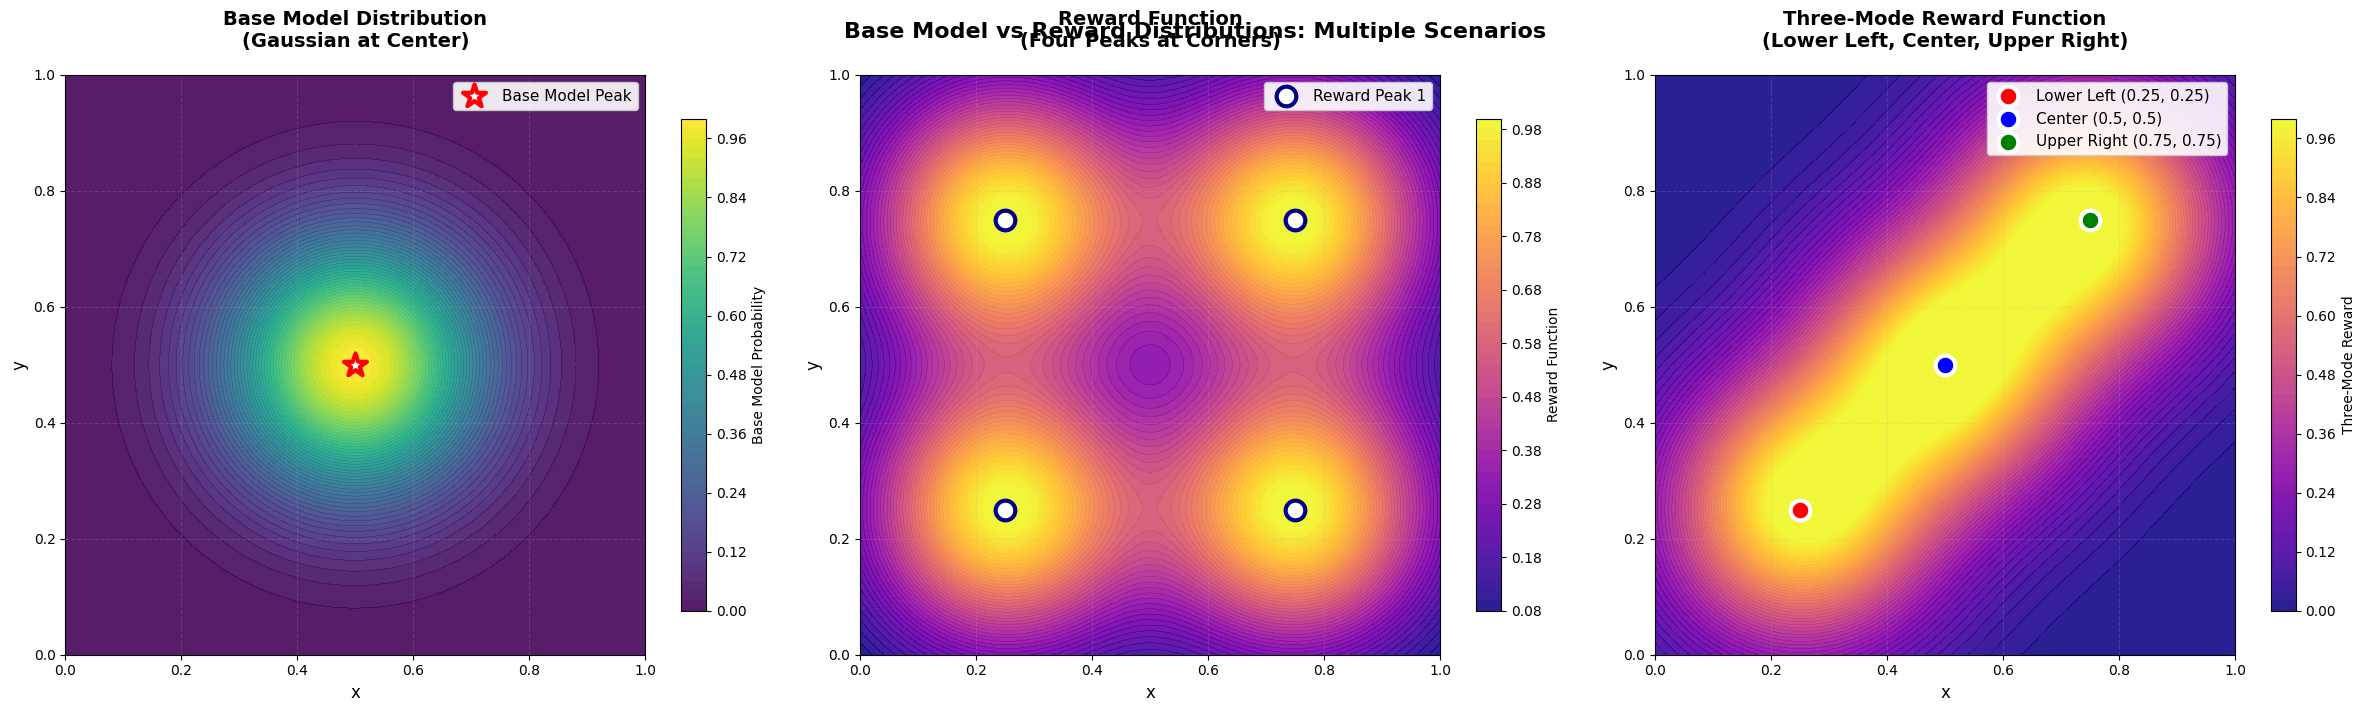

BASE MODEL vs REWARD DISTRIBUTIONS
Base Model: Gaussian at (0.5,0.5), σ=0.15
Four-Quadrant Reward: 4 peaks at corners (0.25,0.25), (0.75,0.25), (0.25,0.75), (0.75,0.75)
Three-Mode Reward: 3 peaks at (0.25,0.25), (0.5,0.5), (0.75,0.75)
TESTING: Base Model OPPOSITE to Reward (Worst Case Scenario)

Base model: Gaussian peak at CENTER (0.5, 0.5)
Reward function: Four peaks at CORNERS (0.25, 0.25), etc.



In [3]:
# VISUALIZE THE BASE MODEL DISTRIBUTION FIRST
visualize_base_model_distribution()

print("="*80)
print("TESTING: Base Model OPPOSITE to Reward (Worst Case Scenario)")
print("="*80 + "\n")

print("Base model: Gaussian peak at CENTER (0.5, 0.5)")
print("Reward function: Four peaks at CORNERS (0.25, 0.25), etc.")
print("="*80 + "\n")

Starting FKC Diffusion Algorithm...
  Created new neural network
Step 0 [COLD START], Budget remaining: 500
  Training CNN on 50 observations
    Loss: 0.0173


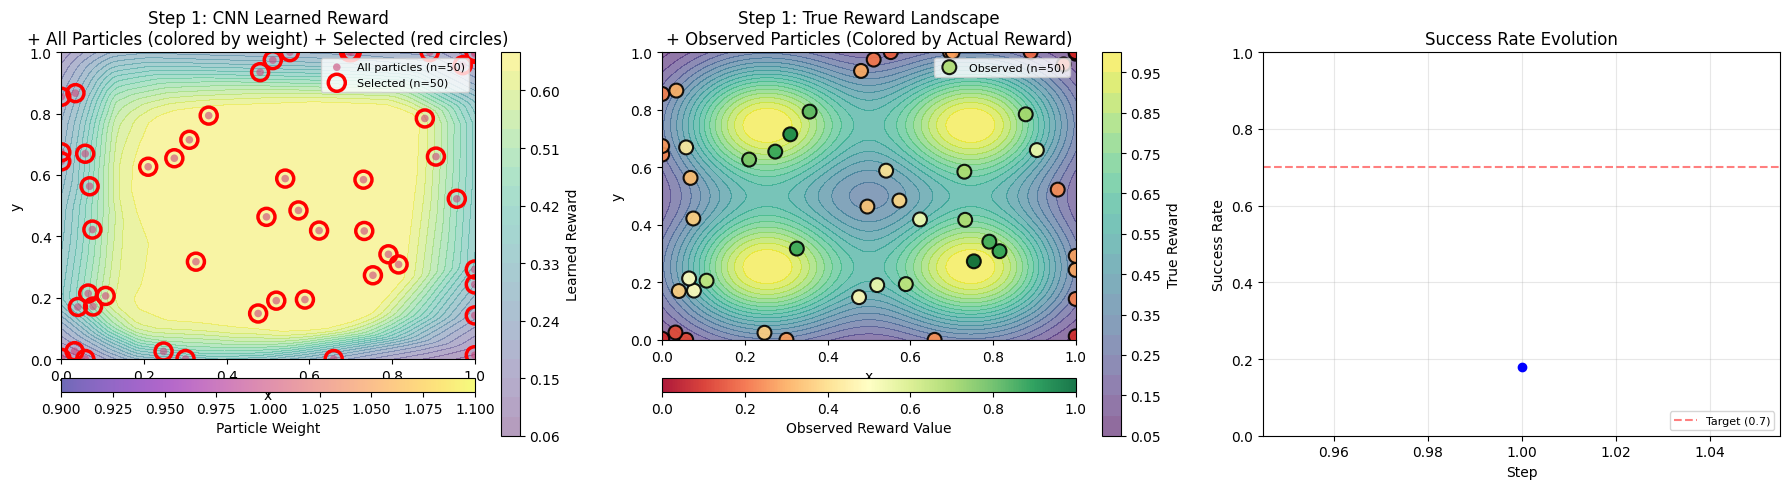

Step 1: 9/50 success (18.0%) | Avg: 0.425
Step 1, Budget remaining: 450
  Convergence check: 0.0590
  Gamma: 0.050 | Diversity: True
  Historical particles: 50
    Weight range: [0.00, 1.00] | Selected: [0.86, 1.00]
  Training CNN on 100 observations...
    Loss: 0.0056


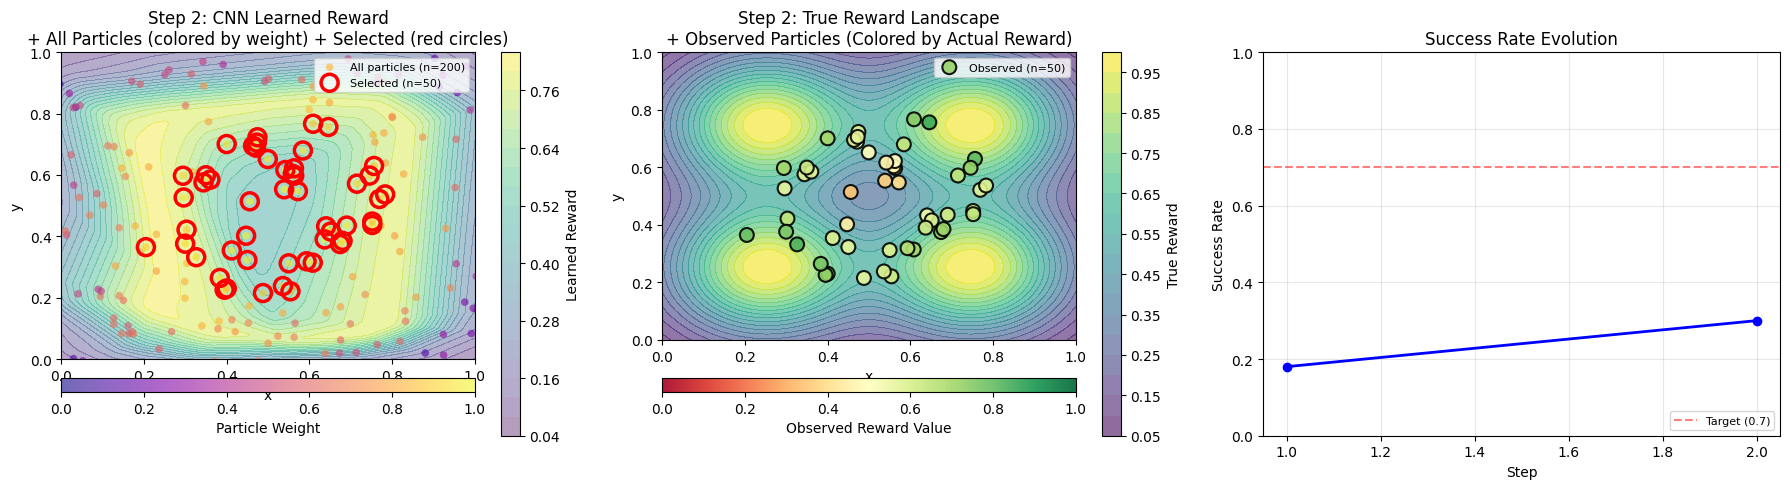

Step 2: 15/50 success (30.0%) | Avg: 0.615
Step 2, Budget remaining: 400
  Convergence check: 0.0618
  Gamma: 0.044 | Diversity: True
  Historical particles: 100
    Weight range: [0.00, 1.00] | Selected: [0.92, 1.00]
  Training CNN on 150 observations...
    Loss: 0.0028


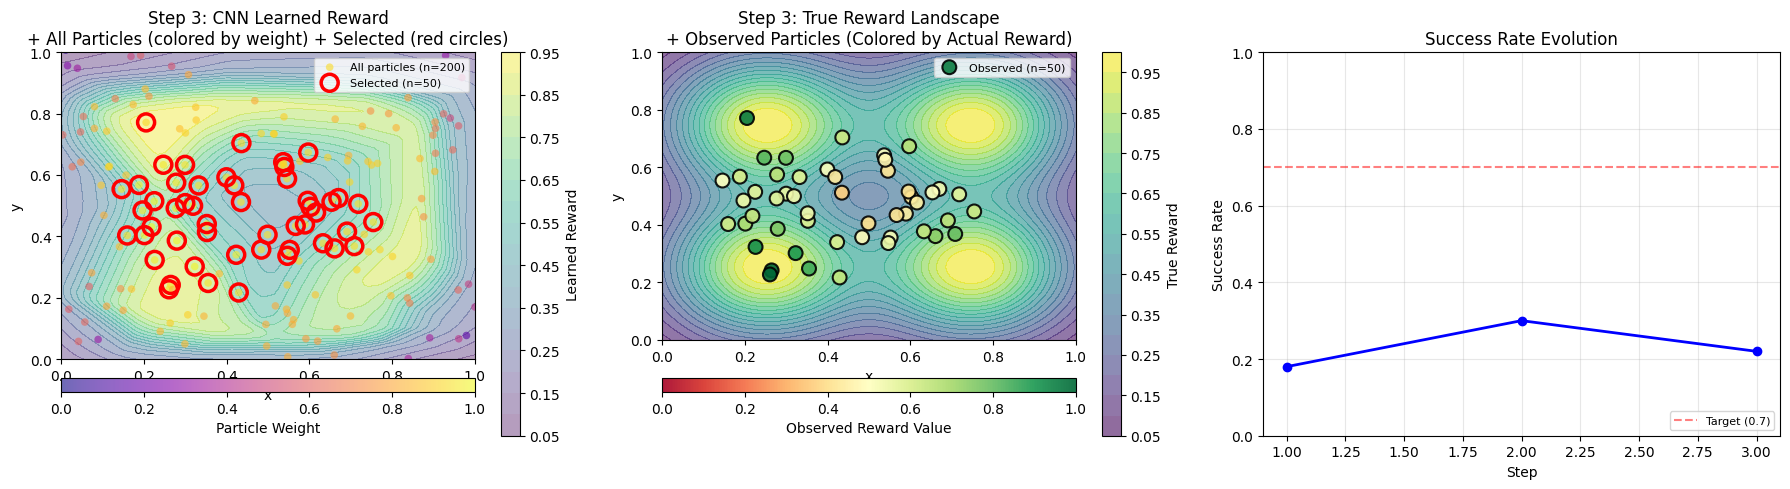

Step 3: 11/50 success (22.0%) | Avg: 0.611
Step 3, Budget remaining: 350
  Convergence check: 0.0241
  *** DIVERSITY DISABLED: Converged ***
  Gamma: 0.039 | Diversity: False
  Historical particles: 150
    Weight range: [0.00, 1.00] | Selected: [0.77, 1.00]
  Training CNN on 200 observations...
    Loss: 0.0016


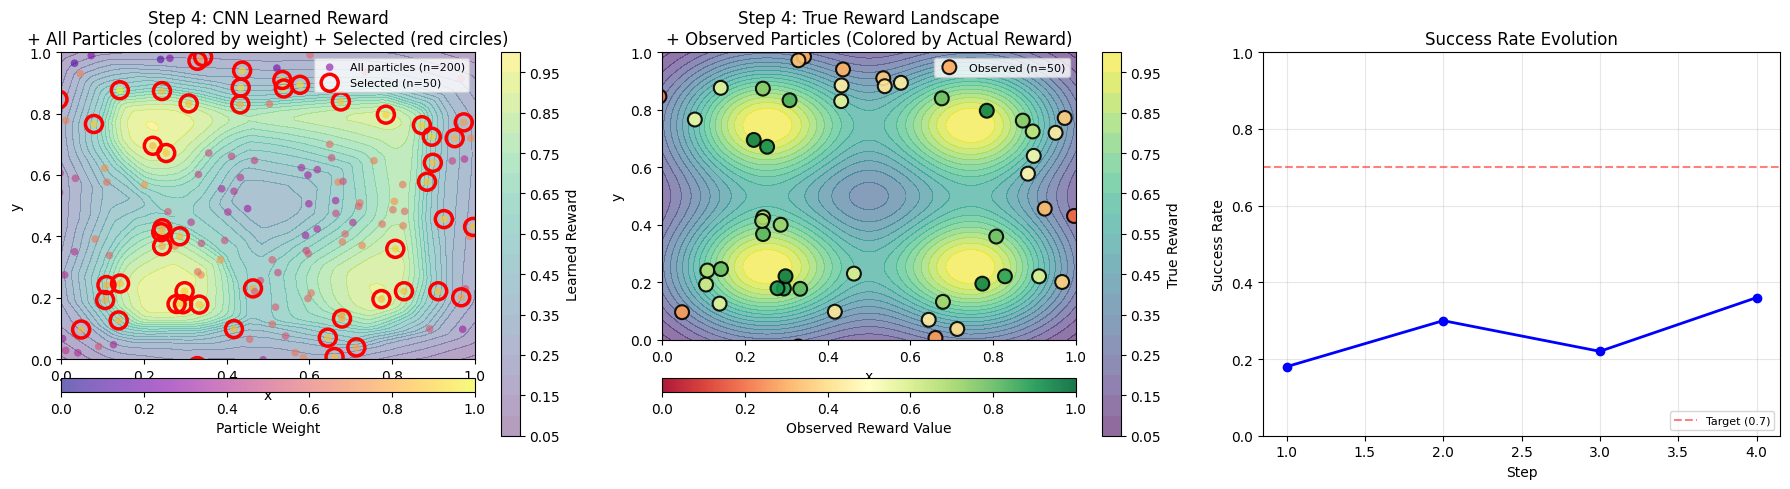

Step 4: 18/50 success (36.0%) | Avg: 0.588
Step 4, Budget remaining: 300
  Gamma: 0.033 | Diversity: False
  Historical particles: 200
    Weight range: [0.00, 1.00] | Selected: [0.70, 1.00]
  Training CNN on 250 observations...
    Loss: 0.0007


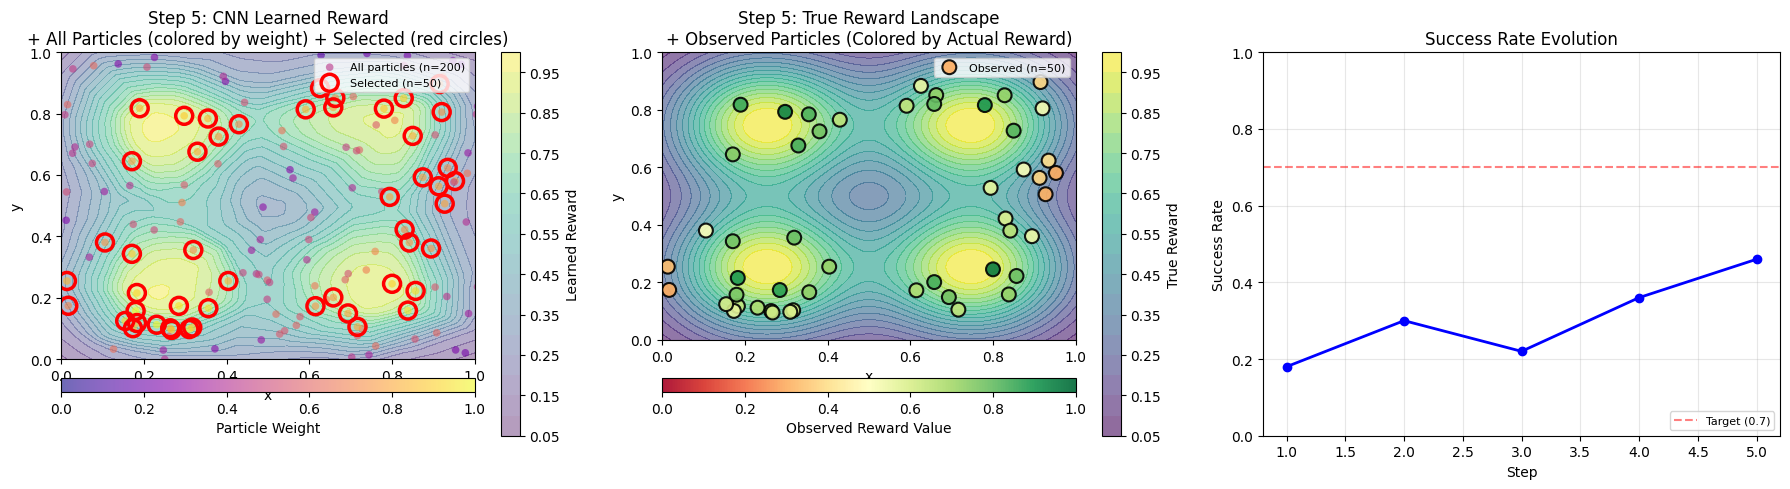

Step 5: 23/50 success (46.0%) | Avg: 0.662
Step 5, Budget remaining: 250
  Gamma: 0.028 | Diversity: False
  Historical particles: 250
    Weight range: [0.00, 1.00] | Selected: [0.70, 1.00]
  Training CNN on 300 observations...
    Loss: 0.0002


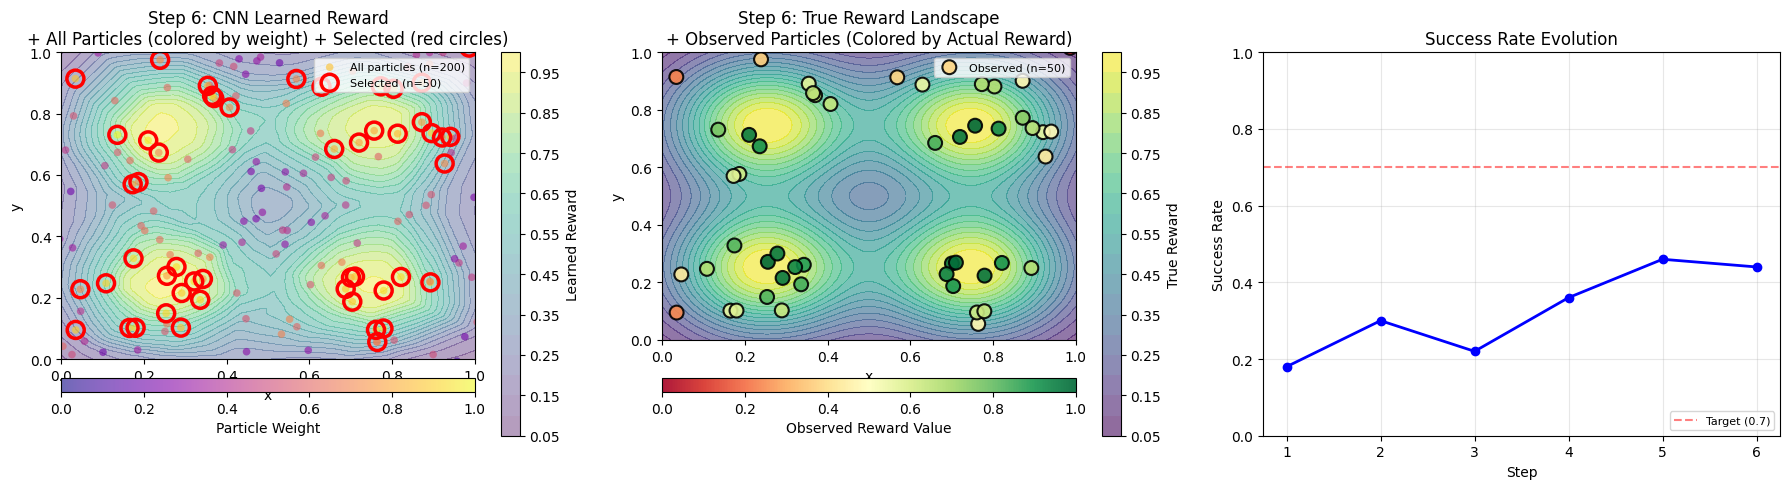

Step 6: 22/50 success (44.0%) | Avg: 0.697
Step 6, Budget remaining: 200
  Gamma: 0.022 | Diversity: False
  Historical particles: 300
    Weight range: [0.00, 1.00] | Selected: [0.68, 1.00]
  Training CNN on 350 observations...
    Loss: 0.0002


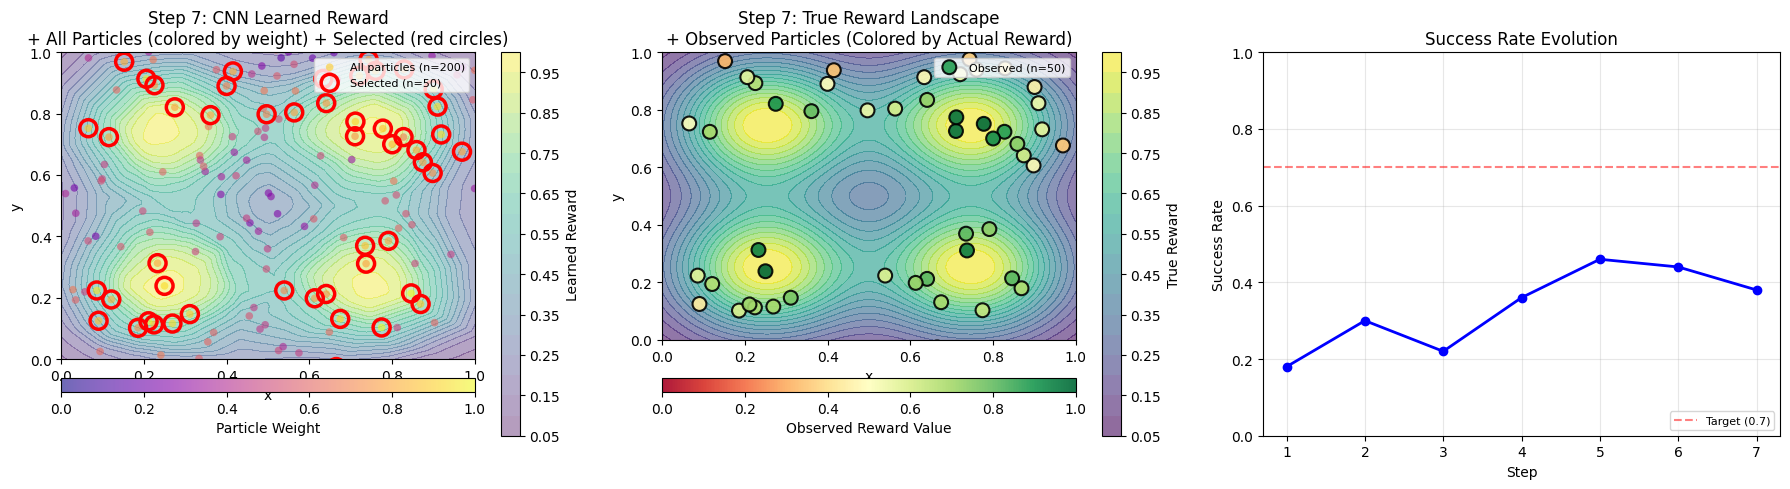

Step 7: 19/50 success (38.0%) | Avg: 0.654
Step 7, Budget remaining: 150
  Gamma: 0.017 | Diversity: False
  Historical particles: 350
    Weight range: [0.00, 1.00] | Selected: [0.72, 1.00]
  Training CNN on 400 observations...
    Loss: 0.0002


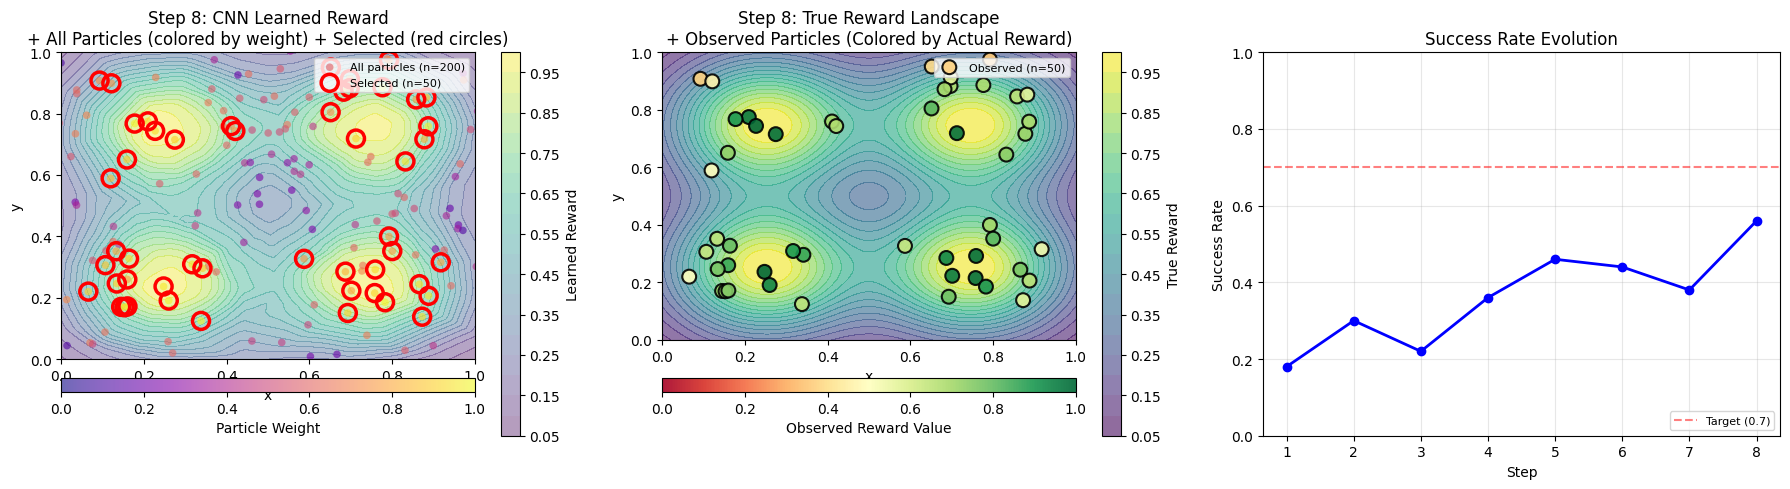

Step 8: 28/50 success (56.0%) | Avg: 0.736
Step 8, Budget remaining: 100
  Gamma: 0.011 | Diversity: False
  Historical particles: 400
    Weight range: [0.00, 1.00] | Selected: [0.70, 1.00]
  Training CNN on 450 observations...
    Loss: 0.0002


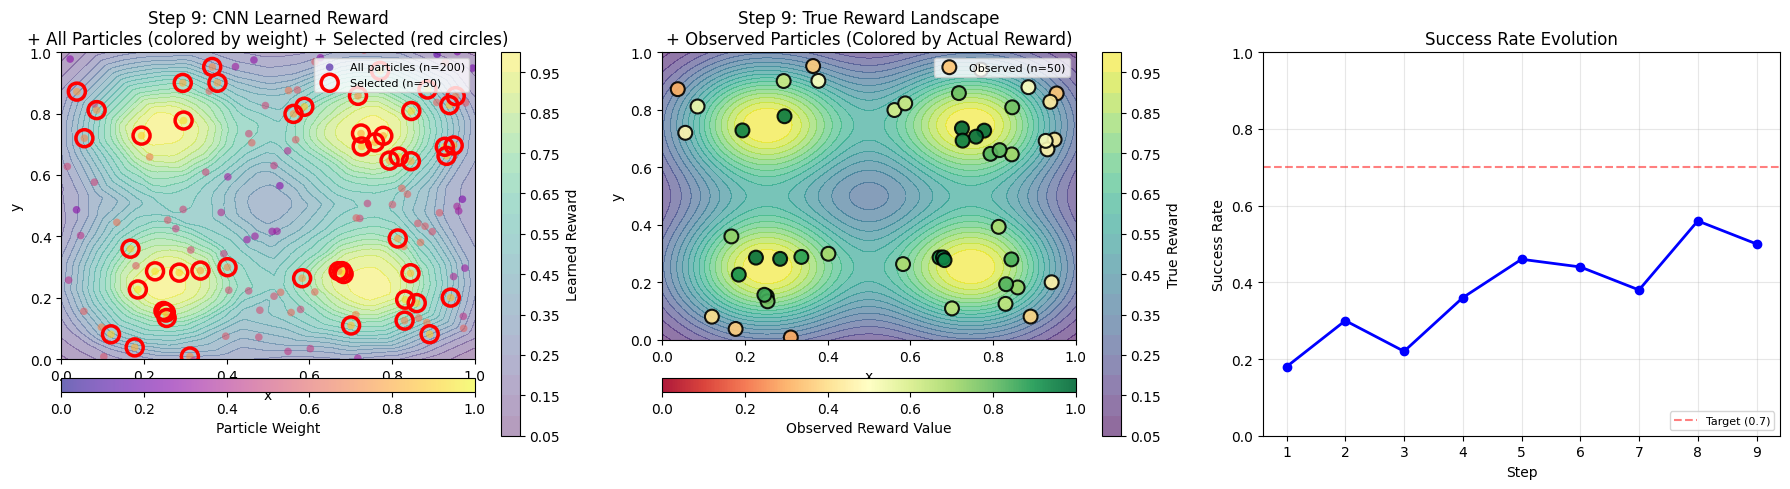

Step 9: 25/50 success (50.0%) | Avg: 0.685
Step 9, Budget remaining: 50
  Gamma: 0.006 | Diversity: False
  Historical particles: 450
    Weight range: [0.00, 1.00] | Selected: [0.72, 1.00]
  Training CNN on 500 observations...
    Loss: 0.0001


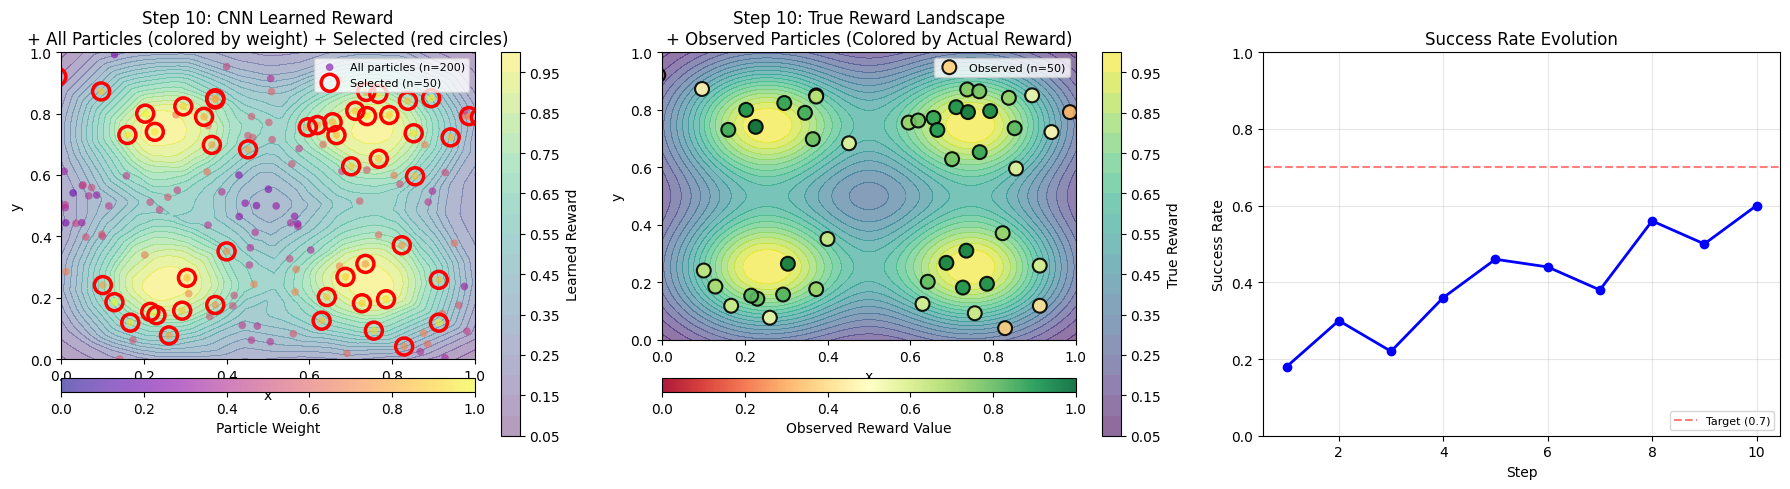

Step 10: 30/50 success (60.0%) | Avg: 0.716
EXPERIMENT COMPLETED


In [4]:
# Run with diversity-based exploration
print("Starting FKC Diffusion Algorithm...")
print("="*80)

results = budget_constrained_diffusion(
    k_observe=k_observe, 
    B=B, 
    n_particles=n_particles,
    n_steps=n_steps,
    reward_fn=reward_function_4optima
)

# Unpack results
(all_particles, all_weights, all_observed_particles, 
 all_observed_rewards, success_rates, 
 trained_network, trained_params, trained_opt_state, 
 gamma_history) = results

print("="*80)
print("EXPERIMENT COMPLETED")
print("="*80)


DIVERSITY-BASED EXPLORATION VISUALIZATION



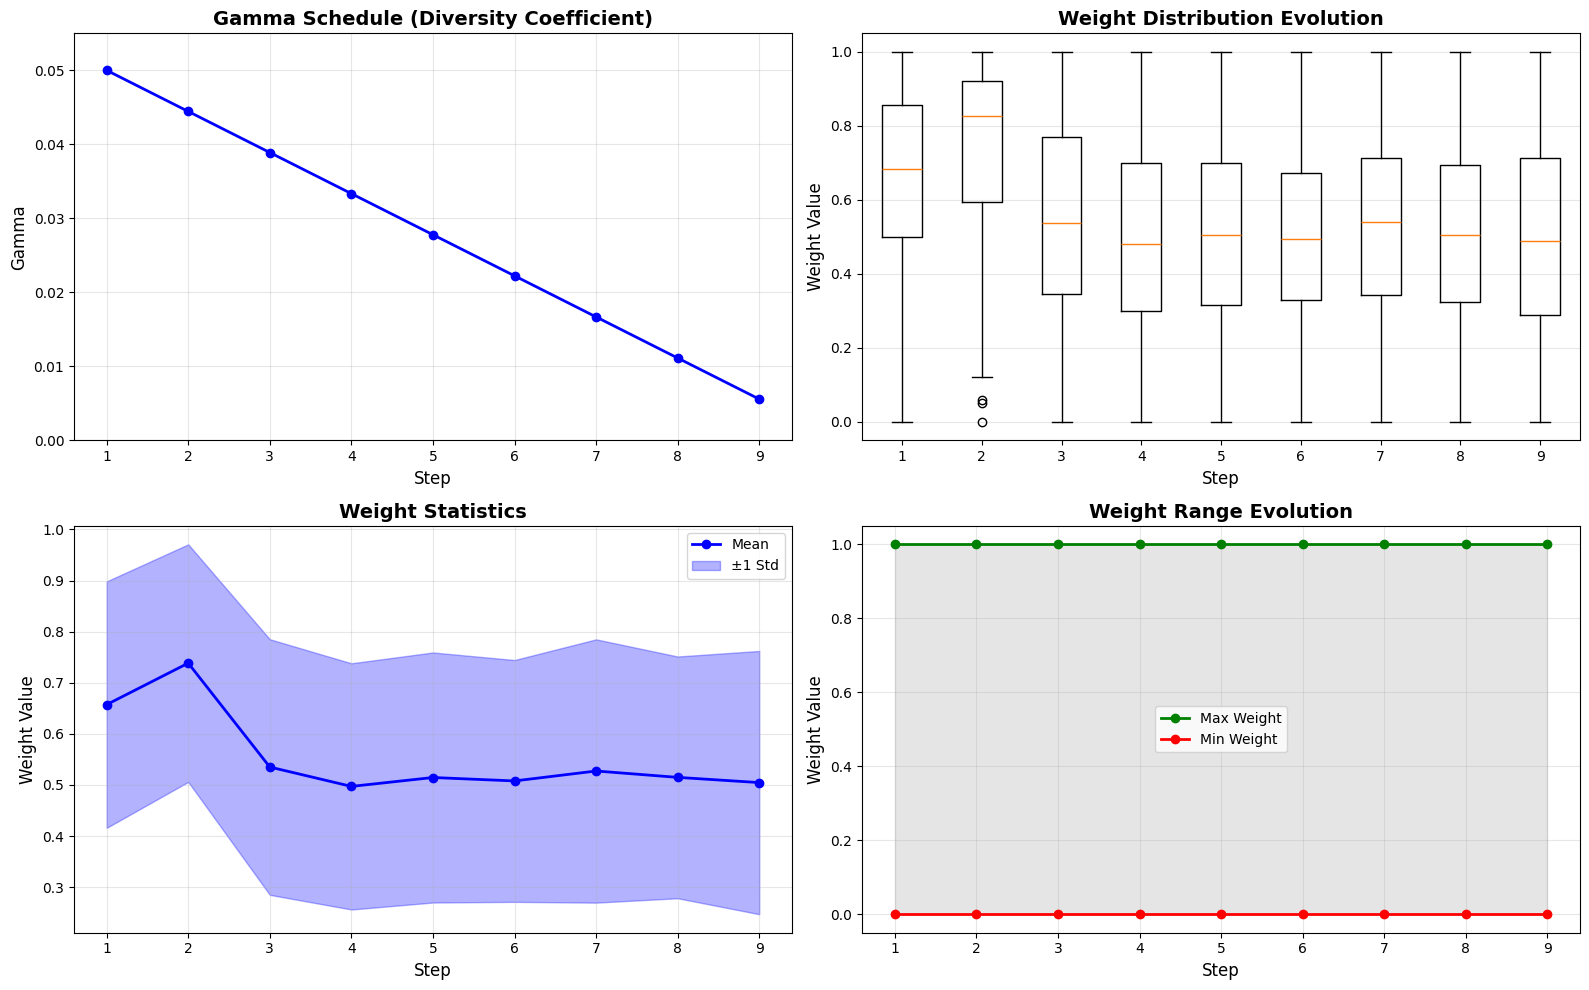


EXPERIMENT SUMMARY
Steps: 9 | Gamma: 0.006→0.050
Selection: top-50 particles | Final gamma: 0.006


In [5]:
# Visualize diversity-based behavior
print("\n" + "="*80)
print("DIVERSITY-BASED EXPLORATION VISUALIZATION")
print("="*80 + "\n")
visualize_gamma_and_diversity(gamma_history, all_weights, k_observe)

In [6]:
# Final analysis
print("\n" + "="*80)
print("FINAL ANALYSIS")
print("="*80)
print(f"Final success rate: {success_rates[-1]:.1%}")
print(f"Max success rate achieved: {max(success_rates):.1%}")
print(f"Average success rate: {np.mean(success_rates):.1%}")

# Additional statistics
print(f"\nTotal steps: {len(success_rates)}")
print(f"Total particles observed: {sum(len(obs) for obs in all_observed_particles)}")
print(f"Budget used: {B - (B % k_observe)}")

# Check if diversity was disabled
diversity_disabled_step = None
for i, gamma in enumerate(gamma_history):
    if gamma == 0.0:
        diversity_disabled_step = i + 1
        break

if diversity_disabled_step:
    print(f"Diversity disabled at step: {diversity_disabled_step}")
else:
    print("Diversity remained enabled throughout experiment")


FINAL ANALYSIS
Final success rate: 60.0%
Max success rate achieved: 60.0%
Average success rate: 40.0%

Total steps: 10
Total particles observed: 500
Budget used: 500
Diversity remained enabled throughout experiment
